# Challenge Name   : Multi Class Classification
# Challenge ID         : DL_NLP_Hack_02

### Author                   : Anoop Sharma
### Sap ID                   : 51719622

## Challenge Description

#####  1. This problem is related to Multi Class Classification which comes under Deep Learning Umbrella
####   2. Provided with medical domain dataset, We need to predict patient condition based on reviews
####   3. Evaluation Criteria :
        a) Performance Matrix : Prediction/True Table > 85%
        b) New Technique : Use latest NLP model with transfer learning
####   4. Proposed Solution :
        a) We will train the model in such  way that it can predict the patient health condition based on       reviews using ML and DL algorithms.This problem is related to NLP (Neuro-Linguistics programming)
        b) Process to proceeds in the order of Data exploration --> Data preprocessing -->Model --> Conclusion--> Limit  

####   5. Data details :
         Patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction
         a) drugsComTrain_raw.csv -- Training Data with history of reviews
         b) Train Shape - (161297, 7)
         c) Columns Details :
                 drugName (categorical): name of drug
                 condition (categorical): name of condition
                 review (text): patient review
                 rating (numerical): 10 star patient rating
                 date (date): date of review entry
                 usefulCount (numerical): number of users who found review useful
        

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
#Open drugreview files
df_train=pd.read_csv("drugsComTrain_raw.csv")
print("Train Data format " ,df_train.head())
print("Train Data shape ",df_train.shape)
print("Condition count in Train dataset ", df_train['condition'].value_counts())
df_train_cond_rev=df_train[['condition','review']].copy()
df_temp=df_train_cond_rev[pd.notnull(df_train_cond_rev['review'])]
df_train_fil=df_temp[pd.notnull(df_temp['condition'])]
print("Dataset with columns Condition and review" , df_train_fil)
print("Dataset with columns Condition and review dimension " ,df_train_fil.shape)

Train Data format     uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37  
T

In [3]:
# Clean patient condition label with bad data
df_comment = df_train_fil[df_train_fil['condition'].str.contains('comment')]
df_comment

,condition,review
105,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f..."
196,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p..."
243,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a..."
264,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con..."
391,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger..."
...,...,...
160322,99</span> users found this comment helpful.,"""Great pill... You can definitely see it worki..."
160791,62</span> users found this comment helpful.,"""I am sharing a painful experience actually. T..."
160899,7</span> users found this comment helpful.,"""I&#039;ve been taking Geodon for about a mont..."
160921,92</span> users found this comment helpful.,"""At 300mg 4x daily my pain was almost gone. """


In [4]:
# Dropping rows that contain incorrect information 

df_train_fil = df_train_fil[~df_train_fil['condition'].str.contains('comment')]
print(df_train_fil.shape)

(159498, 2)


Birth Control                     28788
Depression                         9069
Pain                               6145
Anxiety                            5904
Acne                               5588
                                  ...  
Oppositional Defiant Disorde          1
Cerebrovascular Insufficiency         1
Hypokalemic Periodic Paralysis        1
Tinea Barbae                          1
Klinefelter Syndrome                  1
Name: condition, Length: 811, dtype: int64


Text(0.5, 1.0, 'Top 50  : The number of reviews per patient condition.')

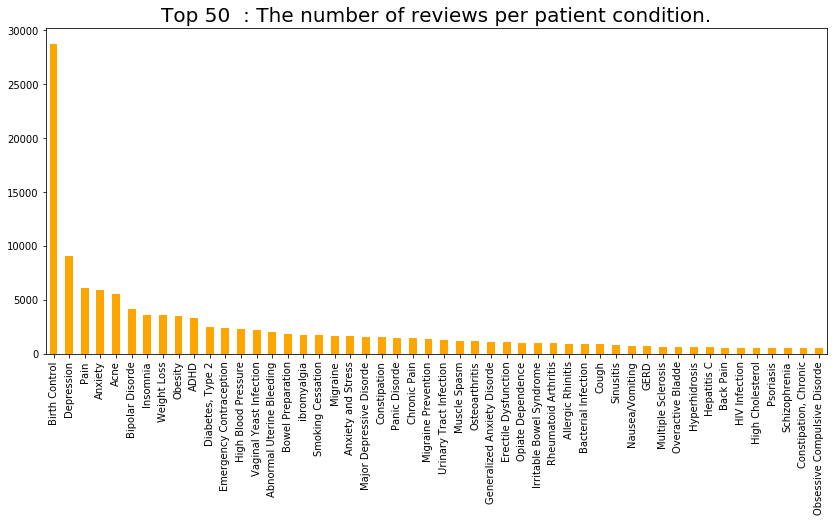

In [5]:
# Data plot based on review and condition
df_condition=df_train_fil.condition.value_counts()
print(df_condition)
df_condition[0:50].plot(kind="bar", figsize = (14,6), fontsize = 10,color="orange")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 50  : The number of reviews per patient condition.", fontsize = 20)

In [6]:
value_counts=df_train_fil['condition'].value_counts()
# Select the values where the count is less than 3 (or 5 if you like)
to_remove = value_counts[value_counts <= 800].index
# Keep rows where the city column is not in to_remove
df_train_fil = df_train_fil[~df_train_fil.condition.isin(to_remove)]
print(" Dataset after removal",df_train_fil.shape)
df_train_fil.condition.value_counts()

 Dataset after removal (114796, 2)


Birth Control                  28788
Depression                      9069
Pain                            6145
Anxiety                         5904
Acne                            5588
Bipolar Disorde                 4224
Insomnia                        3673
Weight Loss                     3609
Obesity                         3568
ADHD                            3383
Diabetes, Type 2                2554
Emergency Contraception         2463
High Blood Pressure             2321
Vaginal Yeast Infection         2274
Abnormal Uterine Bleeding       2096
Bowel Preparation               1859
ibromyalgia                     1791
Smoking Cessation               1780
Migraine                        1694
Anxiety and Stress              1663
Major Depressive Disorde        1607
Constipation                    1595
Panic Disorde                   1463
Chronic Pain                    1455
Migraine Prevention             1413
Urinary Tract Infection         1316
Muscle Spasm                    1244
O

Birth Control                  28788
Depression                      9069
Pain                            6145
Anxiety                         5904
Acne                            5588
Bipolar Disorde                 4224
Insomnia                        3673
Weight Loss                     3609
Obesity                         3568
ADHD                            3383
Diabetes, Type 2                2554
Emergency Contraception         2463
High Blood Pressure             2321
Vaginal Yeast Infection         2274
Abnormal Uterine Bleeding       2096
Bowel Preparation               1859
ibromyalgia                     1791
Smoking Cessation               1780
Migraine                        1694
Anxiety and Stress              1663
Major Depressive Disorde        1607
Constipation                    1595
Panic Disorde                   1463
Chronic Pain                    1455
Migraine Prevention             1413
Urinary Tract Infection         1316
Muscle Spasm                    1244
O

Text(0.5, 1.0, 'Top 50  : The number of reviews per patient condition.')

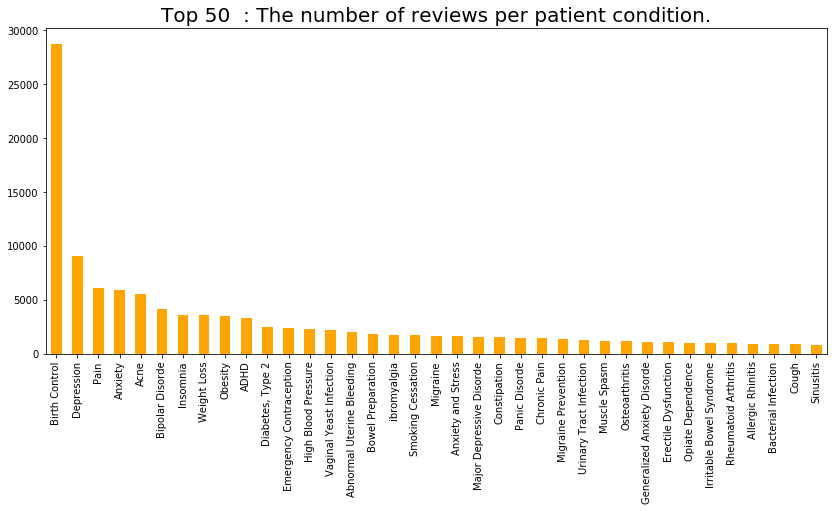

In [7]:
# Data plot based on review and condition
df_condition=df_train_fil.condition.value_counts()
print(df_condition)
df_condition[0:50].plot(kind="bar", figsize = (14,6), fontsize = 10,color="orange")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 50  : The number of reviews per patient condition.", fontsize = 20)

In [8]:
df_train_fil = df_train_fil.sample(frac=0.5, replace=True, random_state=1).copy()
df_train_fil.shape

(57398, 2)

In [9]:
#Clean review comments
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@\d+]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z00-99 #+_]')
add_stop = ['', ' ', 'say', 's', 'u', 'ap', 'afp', '...', 'n', '\\','this','will','doctor','took','got','month','an','weight','if','one','week','when','more','are','weeks','are','would','just','feel','day',
 'im','though','daily','found','daily','found','give','7','gained','happy','sure','told','less','gave','three',
 'side','taking','ive','years','first','effects','take','started','like','months','get','days','time','2','feel','would','3',
 'back', 'also','dont','since', 'also','dont','since', 'cant','stop','morning','however','taken','within','see''good','night',
 'even','year','great','ago','4','tried','little','5','dose','used','worked','1','getting','could','10','almost','put','6','use',
 'nothing','far','helped','normal','gain','recommend','without','long','thing','make','many','noticed','said','ood','best',
 'thought','gone','working','couldnt','anything','something','spotting','things','people','second','need','20','way','half',
 'start','another','completely','wasnt','everything','8','face','bit','high','worth','definitely','pretty','decided','actually',
 'lbs','effective','past','today','helps','heavy','new','may','doesnt','30','minutes','15','problem','dry','came','reviews','shot','issues','trying','switched','depressed','12','full','sometimes','find','meds','change','anyone','caused','thats','results','done','increased','twice','energy','fine','several','hard','read','given','pressure','come','clear','eating','already','insurance','everyone','dosage','mouth','amazing','id','enough','wanted','overall','maybe','began','really','still','never','much','work','went','two','didnt','go','made','works','going','mg','hours','last','ever','lost','lot','try','think','stopped',
 'away','know','times','always','havent','next','due','want','around','experienced','finally','able','right','later','different','hour','keep','dr','changed','makes','least','else','difference','seems','needed','product',
 'point','soon','absolutely','anymore','usually','drink','free','stay','became','recently','awful','small','hoping','believe','felt','better','good','every','well','help','feeling','prescribed','severe','experience','using','effect','worse','body','old','love','see','symptoms','eat','drive','problems','light','starting','insertion','attacks','hope','bed','plan','negative','crazy','major','9','whole','gotten','quit','removed','extreme','food','pack','lasted','end','patch','everyday','constant','person','25','reason','others','medications','thoughts','24','yet','tell','reading','etc','regular','although','suffered','cause','10mg','along','asleep','wake','remember','medicines','100','doctors','hair','left','immediately','hurt','part','constantly','school','per','highly','burning','mind','break','positive','b','super','slight','big','short','head','notice','probably','cycle','deal','cleared','either','woke','seem','wish','increase','wait','boyfriend','let','four','50','18','wouldnt','scared','23','20mg','quite','stuff','continue','takes','thinking','literally','worry','beginning','might','recommended','treatment','early','plus','experiencing','taste','home','seemed','huge','ended','kept','easy','husband','doc','hungry','suffer','crying','wont','third','switch','except','become','isnt','prescription','making','16','coming','family','40','fall','yes','goes','luck','quickly','entire','2015','currently','looking','fast','glad','fatigue','attack','please','straight','yrs','2nd','can','not','thank','dreams','withdrawal','trouble','3rd','cream','happened','fact','function','care','often','kind','50mg','hate','kids','amount','late','especially','instead','gets','switching','wonderful','issue','changes','losing','chest','saved','broke','level','worried','live','totally','loved','14','lighter','type','active','nearly','age','prior','feels','intense','real','1st','son','45','rather','baby','decreased','improved','slowly','someone','focus','self','lots','size','normally','5mg','hospital','irregular','six','yesterday','nervous','rest','cry','uncomfortable','supposed','hopefully','guess','drinking','procedure','knew','called','improvement','giving','11','34','youre','walk','form','asked','slightly','developed','bathroom','expensive','suggested','17','look','okay','sleepy','ok','eventually','course','add','2016','knee','stick','must','brand','five','sensitive','health','wonders','minor','child','comes','none','breakouts','hasnt','adderall','saw','cost','review','unfortunately','red','100mg','leave','affects','occasional','helping','hot','breakthrough','serious','possible','usual','zero','single','pay','perfect','levels','hell','nights','sad','legs','total','friends','handle','doses','seen','difficult','prep','easily','13','throughout','slept','minimal','god','social','continued','turned','mine','reduced','seeing','strong','term','ready','truly','upset','happen','lasts','unbearable','wrong','rid','mostly','evening','says','unprotected','march','case','children','place','25mg','vyvanse','moderate','awesome','pm','reaction','post','60','female','causing','higher','easier']

STOPWORDS = set(stopwords.words('english'))
stop_words=STOPWORDS.union(add_stop)
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
        # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in stop_words) # delete stopwors from text
    return text
    
df_train_fil['review'] = df_train_fil['review'].apply(clean_text)
#print_plot(10)
df_train_fil

,condition,review
138414,Pain,neurontin nerve pain associated paralysis leg ...
109133,Depression,depression psychology study suicidal selfcontr...
7319,ibromyalgia,lyrica pain walking pillows dizzy drunk lose p...
137741,Bipolar Disorde,psychotic diagnosis bipolar mood stabilizer ru...
70413,Birth Control,close together sake sanity remembering pills s...
...,...,...
76462,"Diabetes, Type 2",discontinued horrible throwing spent iv fluids...
94780,Emergency Contraception,ella protected sex condom sleep running wild f...
114328,Depression,slipped suicidal ideations rheumatological dis...
4350,Birth Control,bc mood swings weak tiredbut nexplanon blame a...


In [10]:
import nltk
from nltk.tokenize import word_tokenize
reviews = df_train_fil.review.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:200]

34339


['pain',
 'pill',
 'period',
 'anxiety',
 'bad',
 'medication',
 'life',
 'control',
 'acne',
 'birth',
 'depression',
 'medicine',
 'sleep',
 'mood',
 'periods',
 'bleeding',
 'sex',
 'cramps',
 'drug',
 'skin',
 'nausea',
 'pills',
 'horrible',
 'pounds',
 'swings',
 'blood',
 'headaches',
 'panic',
 'stomach',
 'worst',
 'couple',
 'pregnant',
 'cramping',
 'appetite',
 'painful',
 'loss',
 'terrible',
 'tired',
 'extremely',
 'longer',
 'water',
 'migraines',
 'relief',
 'th',
 'inserted',
 'headache',
 'low',
 'mirena',
 'ill',
 'mild',
 'lose',
 'lexapro',
 'insomnia',
 'infection',
 'nexplanon',
 'med',
 'pregnancy',
 'sick',
 'diagnosed',
 'disorder',
 'sleeping',
 'exercise',
 'migraine',
 'x',
 'nauseous',
 'zoloft',
 'diet',
 'job',
 'heart',
 'lower',
 'bc',
 'iud',
 'chronic',
 'emotional',
 'implanon',
 'diarrhea',
 'miracle',
 'xanax',
 'bipolar',
 'stress',
 'implant',
 'constipation',
 'cymbalta',
 'anxious',
 'moody',
 'er',
 'dizzy',
 'muscle',
 'generic',
 'nd',
 's

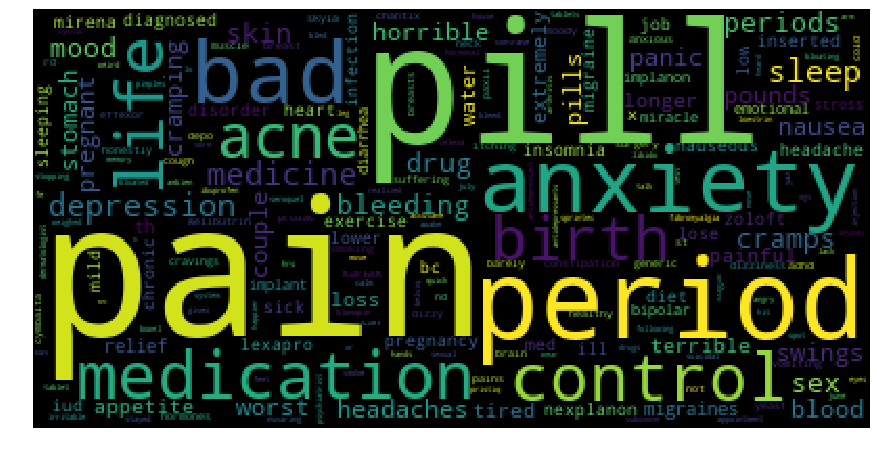

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.figure( figsize=(15,8) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
df_train_fil.review[60:100]
df_train_fil.review.describe()

count     57398
unique    39165
top            
freq        447
Name: review, dtype: object

In [13]:
# Create a new column 'category_id' with encoded categories 
df_train_fil['condition_id'] = df_train_fil['condition'].factorize()[0]
category_id_df = df_train_fil[['condition', 'condition_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['condition_id', 'condition']].values)

# New dataframe
df_train_fil.condition_id.value_counts()

4     14362
1      4578
0      3049
22     2953
28     2744
3      2064
6      1913
14     1769
10     1718
13     1709
7      1266
12     1220
11     1172
16     1154
35      996
18      973
2       914
26      882
25      859
20      845
27      809
32      799
8       730
19      724
33      681
5       662
15      627
17      619
23      600
9       567
30      559
31      537
21      510
24      488
34      472
29      456
36      418
Name: condition_id, dtype: int64

In [14]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each review into a vector
features = tfidf.fit_transform(df_train_fil.review).toarray()
#dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

labels = df_train_fil.condition_id

print("Each of the %d review is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 57398 review is represented by 14457 features (TF-IDF score of unigrams and bigrams)


In [15]:

X = df_train_fil['review'] # Collection of documents
y = df_train_fil['condition'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    stratify=y)


In [16]:
print('Number of data points in train data:', y_train.shape[0])
print('Number of data points in test data:', y_test.shape[0])

Number of data points in train data: 45918
Number of data points in test data: 11480


In [17]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Users/anoopsharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anoopsharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/anoopsharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anoopsharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/anoopsharma/anaconda3/lib/python3.7/site-pa

In [18]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.830843,0.005195
LogisticRegression,0.769397,0.004209
MultinomialNB,0.657376,0.002295
RandomForestClassifier,0.250340,0.000270


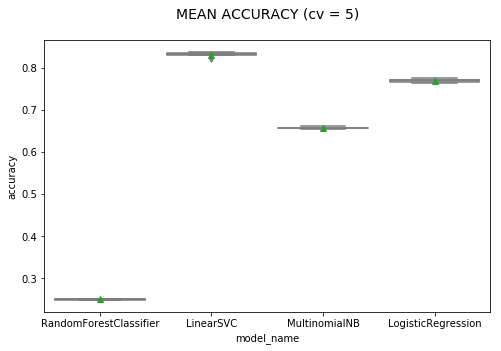

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [20]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df_train_fil.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([ 6, 22,  4, ..., 22, 14,  1])

In [21]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       773
           1       0.64      0.75      0.69      1089
           2       0.83      0.77      0.80       243
           3       0.83      0.78      0.81       499
           4       0.89      0.97      0.93      3606
           5       0.86      0.69      0.76       186
           6       0.85      0.87      0.86       468
           7       0.89      0.89      0.89       304
           8       0.64      0.51      0.57       174
           9       0.94      0.90      0.92       154
          10       0.76      0.70      0.72       452
          11       0.88      0.79      0.83       293
          12       0.95      0.95      0.95       308
          13       0.87      0.85      0.86       438
          14       0.74      0.70      0.72       445
          15       0.79      0.71      0.75       163
          16       0.92      0.92      0.92       30

Text(0.5, 1.0, 'CONFUSION MATRIX - LinearSVC\n')

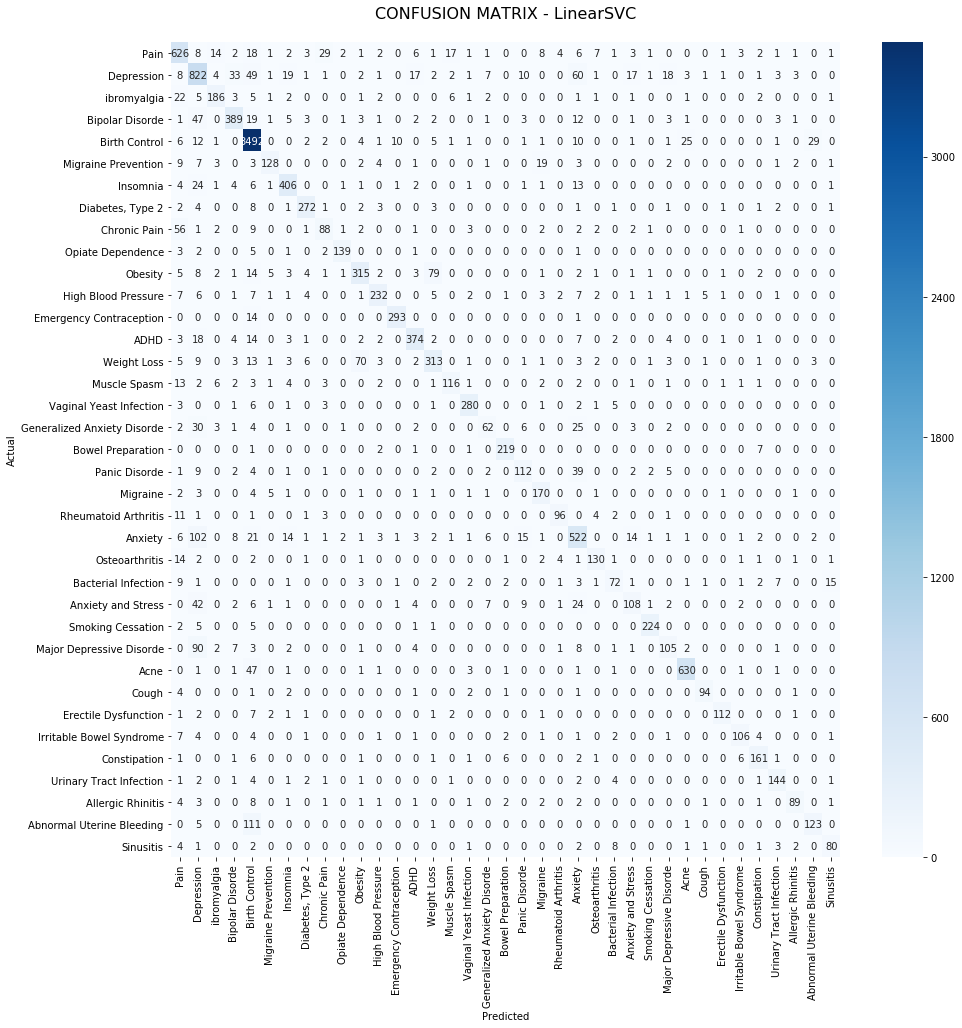

In [23]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.condition.values, 
            yticklabels=category_id_df.condition.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16)